RADMC-3D Hands on Tutorial
===============

## 1) Introduction

### General information

*RADMC-3D is a code package for diagnostic radiative transfer calculations in astronomy and astrophysics. It calculates, for a given geometrical distribution of gas and/or dust, what its images and/or spectra look like when viewed from a certain angle, allowing modelers to compare their models with observed data.*
    -- RADMC-3D code page

**Physics included:**

- **Very detailed manual in package**
- dust continuum: absorption/emission and scattering
- polarisation (scattering and/or thermal)
- atomic/molecules line emission (LTE, LVG, ...) 

**Typical use cases:**

- parametric models of disks, pre-/protostellar cores, AGNs...
- synthetic observations from simulation data


**More information and help**:

- [Code site](http://www.ita.uni-heidelberg.de/~dullemond/software/radmc-3d/)

- [User forum](http://radmc3d.ita.uni-heidelberg.de/phpbb/)

- [radmc3dPy docs](https://www.ast.cam.ac.uk/~juhasz/radmc3dPyDoc/index.html)

- - -
### Installation


Download and unpackage the code:

`curl http://www.ita.uni-heidelberg.de/~dullemond/software/radmc-3d/radmc-3d_v0.41_28.06.17.zip -O 
unzip radmc-3*.zip
cd radmc-3d/version_0.41/src`

Compile and install the binary (and analysis python/IDL routines):

`
make
make install
`

- - -
### Example models

RADMC-3D is provided with example models. 

In [1]:
!ls radmc-3d/version_0.41/examples/

README			     run_simple_1
run_1dpp_dust		     run_simple_1_align
run_lines_lte_0d_1	     run_simple_1_binary
run_lines_lte_3d_1	     run_simple_1_layers
run_lines_lte_3d_2	     run_simple_1_thermbc
run_lines_lte_3d_3	     run_simple_1_userdef
run_lines_nlte_lvg_1d_1      run_simple_1_userdef_refined
run_lines_nlte_optthin_0d_1  run_simple_1_userdefsrc
run_lines_nlte_radextest_1   run_simple_2_scatiso
run_lines_nlte_radextest_2   run_simple_2_scatmat
run_lines_nlte_radextest_3   run_simple_3
run_lines_rotatingring	     run_spher1d_1
run_planetatmo_2d_1	     run_spher2d_1
run_ppdisk_gui		     run_spher2d_1_nomirror
run_ppdisk_herbigae_1	     run_warpeddisk
run_ppdisk_simple_1


### Try simple disk model

Enter the following commands to the terminal to create and run the *run_ppdisk_simple_1* model (from the main folder of the tutorial):

> cd radmc-3d/version_0.41/examples/
> cd run_ppdisk_simple_1

> python problem_setup.py

Run the Monte Carlo radiative transfer to determine dust temperature in the model

> radmc3d mctherm

Optionally use the *setthreads 4* argument to run it on 4 cores

Now that we know the dust temperature perform ray tracing to determine the emission of the dust grains. Create the spectral energy distribution (SED) with inclination 30 deg

> radmc3d sed incl 30

Hint: Dust opacity file contains absorption and scattering opacities. If you want to speed up SED or image calculation and scattering is not relevant at the wavelengths of interest (e.g. far-IR, sub-mm), then set *scattering_mode_max = 0* in radmc3d.inp

**Let's plot the result**

In [2]:
# Import libraries
import os
import tutorial_functions

%matplotlib inline

main_dir = os.getcwd()      # directory of the tutorial

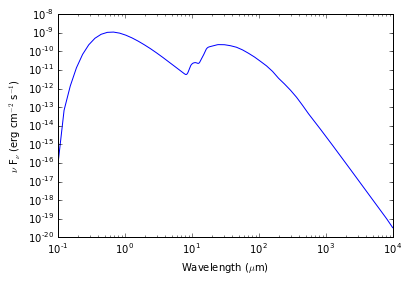

In [3]:
# Note that first you have to run the above given commands in the terminal,
# otherwise you will get error messages!

work_dir = '/radmc-3d/version_0.41/examples/run_ppdisk_simple_1' # example directory
os.chdir(main_dir+work_dir)

tutorial_functions.plot_model_sed()  # see the tutorial_functions.py for details

### Troubleshooting

* Check whether ~/bin is in your search path

* Check whether ~/bin/python is in your python search path

Add the following lines to ~/.bashrc

> export PATH=$PATH:~/

> export PYTHONPATH=$PYTHONPATH:~/bin/python

Then reinitialize your bash environment:

> source ~/.bashrc

### I/O

RADMC-3D is a general purpode radiative transfer code, meaning that it can model arbitrary dust / gas distributions in cartesian, spherical or cylindrical geometries. This also means that the code is not a "disk code" or "molecular cloud code". The user *must* take care of the physical model.

A convinient way for building parametric disk models is provided by radmc3dPy package.

**Required input:**

- radmc3d.inp         (Control parameters)
- amr_grid.inp        (Grid)
- dust_density.inp    (Dust density)
- dustopac.inp        (Opacity control file (opacity file name and type given here)
- dustkappa_XXX.inp   (Opacity file)
- stars.inp           (Stellar parameters)

**Optional input:**

- gas_density.inp     (Defined by user, e.g. from hydro)
- gas_temperature.inp
- gas_velocity.inp    (Gas velocity in \[x,y,z\] or \[r,theta,phi\])
- microturbulence.inp (Unresolved velocity component, broadens the line)
- levelpop XXX.dat    (User defined level population for line transfer)
- numberdens XXX.inp  (Molecular abundance for line transfer)
- source_external.inp (e.g. interstellar radiation field)

- dust_temperature.inp 
- level_pop.out

**Output**

- dust_temperature.dat (radmc3d mctherm)
- image.out (radmc3d image)
- spectrum.out (radmc3d sed)